# Clustering **k-Means**
Técnica descriptiva que genera $k$ clusters (agrupaciones) de los datos numéricos (porque calcula distancias), tal que los datos dentro de un cluster sean lo más parecidos entre ellos, pero que cad cluster sea lo más diferente a los demás

El resultado de esta técnica es un modelo en forma de centroides, uno por cada cluster que caracteriza o describe al cluster al que pertenece.}


In [1]:
# Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Clustering
from sklearn.cluster import MiniBatchKMeans, KMeans #Dos técnicas de kMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin

Correlaciones
          x         y
x  1.000000  0.086263
y  0.086263  1.000000


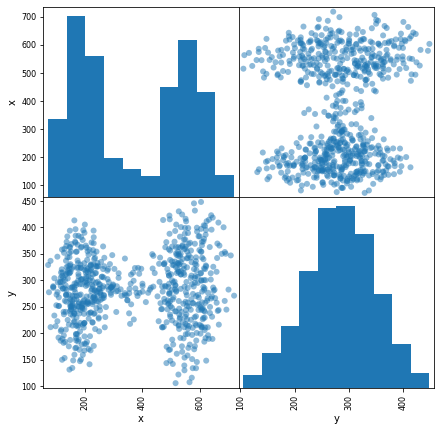

In [2]:
df = pd.read_csv ("./datosEntrada/clustering02.csv");
# Datos generados con https://drawdata.xyz/ 
#cuantosRegistros = len(df.index)  #Cuántos registros de procesarán (TODOS en este caso)
print ("Correlaciones")  # ¿Qué hacer si se detectan correlaciones entre atributos? ¿Se quedan todos o no?
print(df.corr())
pd.plotting.scatter_matrix(df,figsize=(7,7), marker="@");#,grid=True, diagonal="kde", alpha=0.8)

## Eliminación de columnas que **no** son numéricas

In [3]:
# Eliminación de ciertos campos
df=df.drop (columns=["z"])

## Generación de clusters

### Número de clusters a calcular (*k*)

In [4]:
k=3 #Número de clusters a generar (default de 10)

In [16]:
# score 0 es perfecto (el centroide coincide perfectamente con los casos dentro del cluster)
# inertia_ distancia media de los datos con sus centroides

# Se crea el modelo "vacío"
modelo = KMeans(init='k-means++', n_clusters=k, max_iter=500, algorithm="full");   #, n_init=10)
# init determina la forma de inicializar los centroides (k-means++ posiblemente mejor en todos los casos, puede ser "random", fijos si se pasa un arreglo con los centroides)
# max_iter (300 default) es el máximo de iteraciones
# algorithm determina el algoritmo a usar (full es EM, elkan es más eficiente regularmente)

#Se alimenta el modelo con el df de entrada y se calculan los centroides
modelo.fit(df)

KMeans(algorithm='full', max_iter=500, n_clusters=3)

## ¿Dónde quedaron los centroides? (*.cluster_centers*)
Cada centroide tiene un valor para cada atributos

In [6]:
centroides=modelo.cluster_centers_   #Centroides

## Cluster asignados (*.labels_*)

In [7]:
clusterAsignado = modelo.labels_ 
clusterAsignado;

## Clusters asignados

In [9]:
colorPuntos     = ['#ffcdd2', '#a5d6a7', '#bbdefb',"#fff176","#ffab91","#a7ffeb","#d1c4e9","#eeff41","#90a4ae","#f8bbd0","#9ccc65","#81d4fa","#e1bee7","#e6ee9c","#84ffff"]
colorCentroides = ["#d32f2f", "#388e3c", "#1e88e5","#f57f17","#ff5722","#1de9b6","#5e35b1","#aeea00","#455a64","#c2185b","#33691e","#0288d1","#7b1fa2","#9e9d24","#00e5ff"]

# Mide la distancia de los centroides con cada punto para determinar la pertenencia al cluster
clusterAsignado = modelo.labels_     #pairwise_distances_argmin(df, centroides)

## Nuevo CSV con columna de cluster asignado

In [10]:
#Se agrega al df original la columna del cluster asignado

df["clusterAsignado"] = clusterAsignado;
df.to_csv ("dfConCluster.csv")

## Graficación
En el caso de una gráfica de 2D se puede hacer con scatter y adicionar los centroides


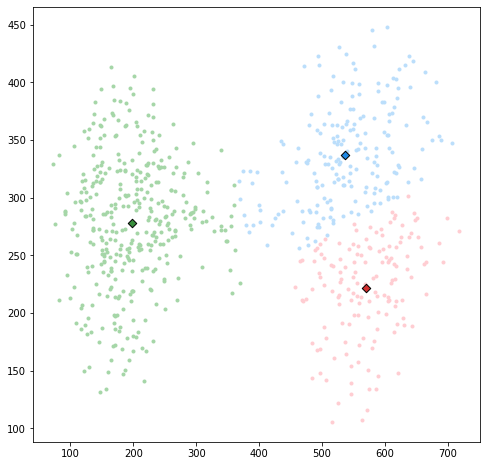

In [11]:
plt.figure (num=1, figsize=(8,8))
for cluster in range(k):        #zip "empareja" un elemento de una lista con un elemento de otra
    #Puntos que pertenecen al cluster
    cualesSI = clusterAsignado == cluster
    centroide = centroides[cluster]
    colorP= colorPuntos[cluster]
    colorC = colorCentroides[cluster]

    plt.scatter(df[cualesSI].x, df[cualesSI].y,color=colorP, marker=".") # Puntos
    
    plt.scatter (centroide[0], centroide[1], marker='D', color=colorC, edgecolors="Black") #Centroide

https://matplotlib.org/stable/api/markers_api.html

## Método *del codo* para aproximar el mejor número de *clusters*

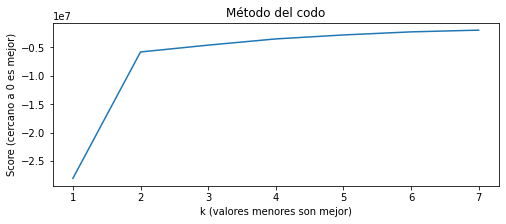

In [12]:
maximoClusters=8
ks = range(1, maximoClusters) #rango del 1 al máximo

kmeans = [KMeans(n_clusters=i, max_iter=500) for i in ks]  #Genera una lista con varios modelos
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] #Calcula el score para cada modelo
plt.figure (num=1, figsize=(8,3))
plt.plot(ks,score) #Imprime k,score para cada uno de los modelos generados

plt.xlabel('k (valores menores son mejor)')
plt.ylabel('Score (cercano a 0 es mejor)')
plt.title('Método del codo')
plt.show()

# Predicción con data frame diferente
Se carga un conjunto de datos y se utiliza el modelo para crear los clusters

In [13]:
# Carga nuevos datos
otroDF = pd.read_csv ("./datosEntrada/clustering03.csv");

# Elimina columnas que no se necesitan
otroDF=otroDF.drop (columns=["z"])

# Conel modelo generado, se utiliza el nuevo conjunto de datos para calcular el cluster
clusterAsignado=modelo.predict (otroDF)

## Graficación del nuevo conjunto de datos

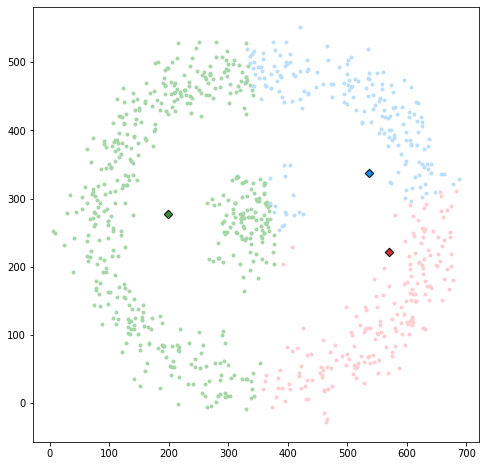

In [14]:
plt.figure (num=1, figsize=(8,8))
for cluster in range(k):        #zip "empareja" un elemento de una lista con un elemento de otra
    #Puntos que pertenecen al cluster
    cualesSI = clusterAsignado == cluster
    centroide = centroides[cluster]
    colorP= colorPuntos[cluster]
    colorC = colorCentroides[cluster]

    plt.scatter(otroDF[cualesSI].x, otroDF[cualesSI].y,color=colorP, marker=".") # Puntos
    
    plt.scatter (centroide[0], centroide[1], marker='D', color=colorC, edgecolors="Black") #Centroide

In [15]:
import datetime as dt
print ("Fin del notebook", dt.datetime.today())

Fin del notebook 2021-10-14 19:14:47.655656
